# Introduction

This Jupyter Notebook looks at the rates of diagnosis of depression in Birmingham. 

The data sources it uses are:

- [A breakdown of the number of patients in each gp practice by the lsoa they are registered as living in](
https://digital.nhs.uk/data-and-information/publications/statistical/patients-registered-at-a-gp-practice/january-2018)

- [Indices of Multiple Deprivation - 2015. Data that gives the Index of Multiple Deprivation rank and decile for Lower Super Output Areas](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2015)

- [Quality Outcome Framework data that gives the prevalence rates for the diagnosis of 21 medical conditions by gp practice](https://digital.nhs.uk/data-and-information/publications/statistical/quality-and-outcomes-framework-achievement-prevalence-and-exceptions-data/quality-and-outcomes-framework-qof-2016-17)

- [Ethnicity breakdown at lower super output area level based on data from the 2011 census on the NOMIS website](https://www.nomisweb.co.uk)*

We first built a data model that calculated estimated rates for the diagnosis of conditions at lsoa level.

After generating these estimates a [Tableau visualisation was created](https://public.tableau.com/profile/mikelcu#!/vizhome/BirminghamQOFbyLSOA/Map) which showed that more deprived lsoas in central Birmingham showed a lower diagnosis rate for depression than both more affluent areas and the more deprived areas that we recognised as having a whiter population. Because of this we decided to investigate further what the relative influence of deprivation and ethnicity might be in the diagnosis of depression in Birmingham.

## Notes on factors that may affects the accuracy of this analysis

The NOMIS site includes the following explanatory text
>“In order to protect against disclosure of personal information, records have been swapped between different geographic areas. Some counts will be affected, particularly small counts at the lowest geographies”

this may affect our analysis in ways that we are unable to quantify at the moment.

In this post we are going to analyse the clusters that we created in [Birmingham Depression Clustering](http://localhost:8888/notebooks/Google%20Drive/qof/Birmingham%20Depression%20Clustering.ipynb#Clustering).

# Clustering

First, we import the libraries that we are going to be using.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

#visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

The following code suppresses the use of scientific float notation in Jupyter notebooks. It makes the analysis easier to follow. 

In [2]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

Next, we import the data file into a Pandas Dataframe, df and then take a copy of this as df_orig.

In [3]:
df = pd.read_csv('./clustered.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')
df_orig = df.copy(deep=True)

Take a look at the first five rows in the DataFrame.

In [4]:
df.head()

,Unnamed: 0,lsoa,imd_rank,imd_decile,indicator_group,estimated_pats_with_condition,All_ethnicities,White,Gypsy_traveller,Mixed_Ethnicity,...,Bangladeshi,Chinese,Other_Asian,Black_African_Caribbean,Other,group_desc,list_type,patients,ward_name,cluster
0,0,E01009417,22255,7,DEP,81.437118,1493,1338,0,26,...,0,1,14,27,15,Depression,18OV,1647,Sutton Four Oaks,1
1,1,E01009418,14654,5,DEP,82.308745,1471,1308,1,42,...,0,2,18,28,1,Depression,18OV,1635,Sutton Four Oaks,1
2,2,E01009419,18033,6,DEP,79.739249,1322,1192,1,17,...,6,1,1,13,12,Depression,18OV,1523,Sutton Four Oaks,1
3,3,E01009433,29446,9,DEP,90.585044,1759,1554,0,29,...,5,4,3,45,5,Depression,18OV,1863,Sutton Four Oaks,1
4,4,E01009415,30694,10,DEP,89.069990,1638,1485,1,33,...,2,7,13,7,2,Depression,18OV,1782,Sutton Four Oaks,1


We have clustered our original DataFrame into five groups. In this next step we will analysis the individual clusters.

First, let's take a look at the relative sizes of the clusters.

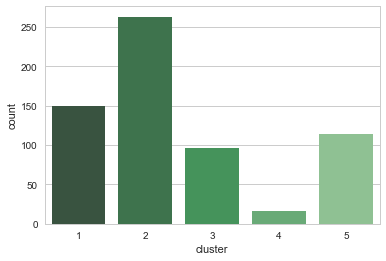

In [5]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="cluster", data=df_orig, palette="Greens_d")

Our clusters are by no means equally distributed. This is fine as we are trying to cluster similar rows together and this is unlikely to result in clusters of equal sizes.

In [6]:
df_orig["cluster"].value_counts()

2    263
1    150
5    114
3     96
4     16
Name: cluster, dtype: int64

## People diagnosed with depression by cluster

For each cluster we calculate:
1. The total number of people in the cluster
2. Our estimate of how many of them are diagnosed with depression and 
3. The percentage that represents

In [7]:
cd = pd.DataFrame(df_orig.groupby(['cluster'])[["All_ethnicities", "estimated_pats_with_condition"]].sum())
cd['percentages'] = (cd["estimated_pats_with_condition"]/cd['All_ethnicities'])*100
cd = cd.round({'estimated_pats_with_condition':0, 'percentages':2})
cd = cd.rename(index=str, columns={"All_ethnicities": "Total"})
cd

,Total,estimated_pats_with_condition,percentages
cluster,,,
1,234466,16771.0,7.15
2,418004,36248.0,8.67
3,184532,10149.0,5.50
4,34561,2412.0,6.98
5,201482,14097.0,7.00


Cluster 1
Cluster size is 234466
Percentage of cluster diagnosed with depression is 7.15


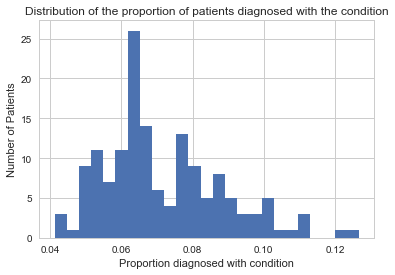

Cluster 2
Cluster size is 418004
Percentage of cluster diagnosed with depression is 8.67


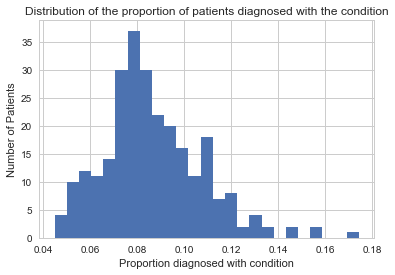

Cluster 3
Cluster size is 184532
Percentage of cluster diagnosed with depression is 5.5


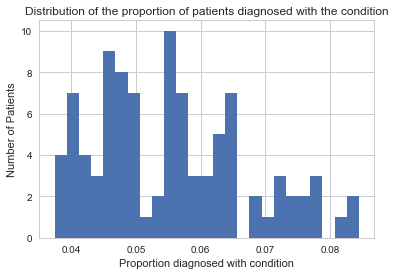

Cluster 4
Cluster size is 34561
Percentage of cluster diagnosed with depression is 6.98


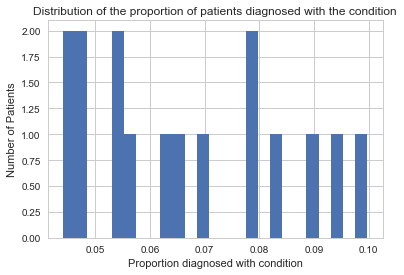

Cluster 5
Cluster size is 201482
Percentage of cluster diagnosed with depression is 7.0


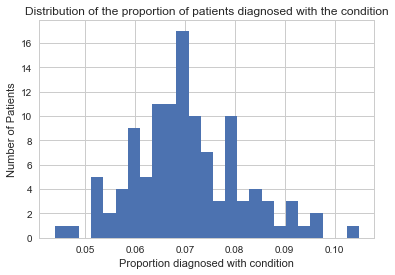

In [8]:
#Prevalence of people with depression
df_orig['proportion_of_estimated_pats_with_condition'] = df_orig['estimated_pats_with_condition']/df_orig['All_ethnicities']

column = ["proportion_of_estimated_pats_with_condition"]
for i in range (1,6):
    prevalence = pd.DataFrame((df_orig.loc[df_orig['cluster'] == i][column]))
    print("Cluster "+str(i))
    print ("Cluster size is ")+str((cd['Total'].iloc[i-1]))
    print ("Percentage of cluster diagnosed with depression is "+str((round(cd['percentages'].iloc[i-1], 2))))
    plt.hist(prevalence['proportion_of_estimated_pats_with_condition'], bins = 25);
    plt.xlabel('Proportion diagnosed with condition'); plt.ylabel('Number of Patients'); 
    plt.title('Distribution of the proportion of patients diagnosed with the condition');
    plt.show()


Clusters 2 and 3 show the greatest variance from the overall rate of diagnosis of depression (7.25%).

# Clustering Ethnicity Analysis

We are going to follow the same stages of analysis as we did in the [initial analysis](http://localhost:8888/notebooks/Google%20Drive/qof/Birmingham_Depression_Initial_Analysis_Blog_Post.ipynb). <br>
We can separate out each cluster by using the following command.

In [9]:
df_orig.loc[df_orig['cluster'] == 1]

,Unnamed: 0,lsoa,imd_rank,imd_decile,indicator_group,estimated_pats_with_condition,All_ethnicities,White,Gypsy_traveller,Mixed_Ethnicity,...,Chinese,Other_Asian,Black_African_Caribbean,Other,group_desc,list_type,patients,ward_name,cluster,proportion_of_estimated_pats_with_condition
0,0,E01009417,22255,7,DEP,81.437118,1493,1338,0,26,...,1,14,27,15,Depression,18OV,1647,Sutton Four Oaks,1,0.054546
1,1,E01009418,14654,5,DEP,82.308745,1471,1308,1,42,...,2,18,28,1,Depression,18OV,1635,Sutton Four Oaks,1,0.055954
2,2,E01009419,18033,6,DEP,79.739249,1322,1192,1,17,...,1,1,13,12,Depression,18OV,1523,Sutton Four Oaks,1,0.060317
3,3,E01009433,29446,9,DEP,90.585044,1759,1554,0,29,...,4,3,45,5,Depression,18OV,1863,Sutton Four Oaks,1,0.051498
4,4,E01009415,30694,10,DEP,89.069990,1638,1485,1,33,...,7,13,7,2,Depression,18OV,1782,Sutton Four Oaks,1,0.054377
5,5,E01009422,27657,9,DEP,103.625065,1912,1801,1,18,...,5,8,20,4,Depression,18OV,2090,Sutton Four Oaks,1,0.054197
6,6,E01009423,11631,4,DEP,88.989255,1677,1510,0,47,...,4,13,44,1,Depression,18OV,1734,Sutton Four Oaks,1,0.053065
7,7,E01009425,23245,8,DEP,94.378425,1693,1569,0,26,...,6,10,20,2,Depression,18OV,1821,Sutton Four Oaks,1,0.055746
8,8,E01009416,28212,9,DEP,178.841811,2669,2328,1,68,...,20,32,28,25,Depression,18OV,3007,Sutton Four Oaks,1,0.067007
9,9,E01009420,27070,9,DEP,97.991441,1537,1420,0,15,...,3,22,19,5,Depression,18OV,1802,Sutton Four Oaks,1,0.063755


We can use the following snippet of code to analyse Cluster 1 for the proportion of the total population that it contains as well as its ethnicity breakdown.

Cluster 1
Cluster population is 234466
This cluster contains 21.85 % of Birmingham's population


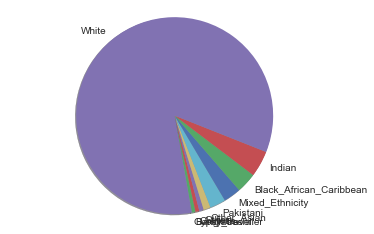

                         totals  percentages
Gypsy_traveller              38     0.016207
Bangladeshi                1408     0.600514
Chinese                    1492     0.636340
Other                      1717     0.732302
Other_Asian                2702     1.152406
Pakistani                  6084     2.594833
Mixed_Ethnicity            6692     2.854145
Black_African_Caribbean    7788     3.321590
Indian                    10078     4.298278
White                    196467    83.793386


In [10]:
columns_to_total = ["Bangladeshi", "Black_African_Caribbean", "Chinese", "Gypsy_traveller", "Indian", "Mixed_Ethnicity", "Other", "Other_Asian", "Pakistani", "White"]
ethnicity_totals = pd.DataFrame((df_orig.loc[df_orig['cluster'] == 1][columns_to_total].sum()).sort_values(), columns = ['totals'])
ethnicity_totals['percentages']= 100*ethnicity_totals['totals']/ethnicity_totals['totals'].sum()
ethnicity_totals
print ("Cluster 1")
print ("Cluster population is "+str(ethnicity_totals['totals'].sum()))
print ("This cluster contains "+str(round(100*(float(ethnicity_totals['totals'].sum())/df_orig['All_ethnicities'].sum()), 2))+" % of Birmingham's population")
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1) 
plt.pie(ethnicity_totals['totals'], labels=ethnicity_totals.index,  shadow=True, startangle=280, radius = 2)
plt.axis('equal')
plt.show()
print(ethnicity_totals)

Cluster 1 has 22% of the population of the city. It contains a heavy proportion of people of white ethnicity compared with the city as a whole.

We can wrap a for loop around this code, rewrite it a bit and produce the same analysis for all of the clusters.

Cluster 1
Cluster population is 234466
This cluster contains 21.85 % of Birmingham's population


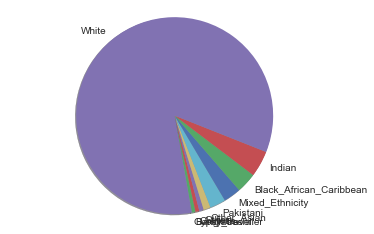

                         totals  percentages
White                    196467    83.793386
Indian                    10078     4.298278
Black_African_Caribbean    7788     3.321590
Mixed_Ethnicity            6692     2.854145
Pakistani                  6084     2.594833
Other_Asian                2702     1.152406
Other                      1717     0.732302
Chinese                    1492     0.636340
Bangladeshi                1408     0.600514
Gypsy_traveller              38     0.016207




Cluster 2
Cluster population is 418004
This cluster contains 38.95 % of Birmingham's population


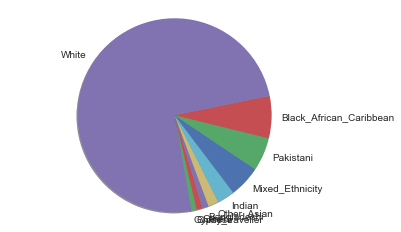

                         totals  percentages
White                    311707    74.570339
Black_African_Caribbean   29421     7.038449
Pakistani                 23247     5.561430
Mixed_Ethnicity           22106     5.288466
Indian                    12112     2.897580
Other_Asian                7260     1.736825
Bangladeshi                4317     1.032765
Other                      4243     1.015062
Chinese                    3467     0.829418
Gypsy_traveller             124     0.029665




Cluster 3
Cluster population is 184532
This cluster contains 17.2 % of Birmingham's population


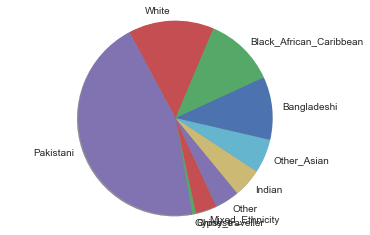

                         totals  percentages
Pakistani                 82934    44.942883
White                     26215    14.206208
Black_African_Caribbean   21701    11.760020
Bangladeshi               19349    10.485444
Other_Asian               10439     5.657013
Indian                     8818     4.778575
Other                      7488     4.057833
Mixed_Ethnicity            6471     3.506709
Chinese                    1060     0.574426
Gypsy_traveller              57     0.030889




Cluster 4
Cluster population is 34561
This cluster contains 3.22 % of Birmingham's population


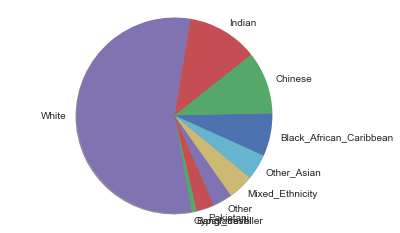

                         totals  percentages
White                     19141    55.383235
Indian                     4041    11.692370
Chinese                    3580    10.358497
Black_African_Caribbean    2454     7.100489
Other_Asian                1467     4.244669
Mixed_Ethnicity            1464     4.235989
Other                      1103     3.191459
Pakistani                  1013     2.931049
Bangladeshi                 285     0.824629
Gypsy_traveller              13     0.037615




Cluster 5
Cluster population is 201482
This cluster contains 18.78 % of Birmingham's population


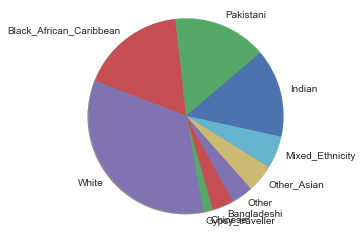

                         totals  percentages
White                     67698    33.600024
Black_African_Caribbean   34996    17.369294
Pakistani                 31349    15.559206
Indian                    29572    14.677242
Mixed_Ethnicity           10872     5.396016
Other_Asian                9280     4.605870
Other                      7253     3.599825
Bangladeshi                7173     3.560120
Chinese                    3113     1.545051
Gypsy_traveller             176     0.087353






In [11]:
columns_to_total = ["Bangladeshi", "Black_African_Caribbean", "Chinese", "Gypsy_traveller", "Indian", "Mixed_Ethnicity", "Other", "Other_Asian", "Pakistani", "White"]
for i in range (1,6):
    ethnicity_totals = pd.DataFrame((df_orig.loc[df_orig['cluster'] == i][columns_to_total].sum()).sort_values(), columns = ['totals'])
    ethnicity_totals['percentages']= 100*ethnicity_totals['totals']/ethnicity_totals['totals'].sum()
    print ("Cluster "+str(i))
    print ("Cluster population is "+str(ethnicity_totals['totals'].sum()))
    print ("This cluster contains "+str(round(100*(float(ethnicity_totals['totals'].sum())/df_orig['All_ethnicities'].sum()), 2))+" % of Birmingham's population")
    explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1) 
    plt.pie(ethnicity_totals['totals'], labels=ethnicity_totals.index,  shadow=True, startangle=280, radius = 2)
    plt.axis('equal')
    plt.show()
    print(ethnicity_totals.sort_values(by=['totals'], ascending = False))
    print ("\n")
    print ("\n")

We can describe the ethnicity breakdown of the five clusters as follows:

Cluster 1<br>
Contains 21.85% of Birmingham's total population<br>
Has a much higher proportion of people of white ethnicity than average in Birmingham <br>
Has a lower proportion of people of all other ethnicities than average in Birmingham <br>

Cluster 2<br>
Contains 38.95% of Birmingham's total population<br>
Has a higher proportion of people of white ethnicity than average in Birmingham <br>
Has a lower proportion of people of all other ethnicities than average in Birmingham <br>

Cluster 3<br>
Contains 17.2% of Birmingham's total population<br>
Has a much higher proportion of people of Pakistani ethnicity than average in Birmingham <br>
Has a higher proportion of people of Black_African_Caribbean and Bangladeshi ethnicity than average in Birmingham <br>
Has a much lower proportion of people of white ethnicity than average in Birmingham <br>

Cluster 4<br>
Contains 3.22% of Birmingham's total population<br>
Has a higher proportion of people of Indian and Chinese ethnicities than average in Birmingham <br>
Has a much lower proportion of people of Pakistani ethnicity than average in Birmingham <br>

Cluster 5<br>
Contains 18.78% of Birmingham's total population<br>
Has a much higher proportion of people of Black_African_Caribbean and Indian ethnicities than average in Birmingham <br>
Has a slightly higher proportion of people of Pakistani ethnicity than average in Birmingham <br>
Has a lower proportion of people of white ethnicity than average in Birmingham <br>


## Deprivation analysis of clusters

We can look at the breakdown of imd_deciles in cluster 1 as follows. It shows that cluster 1 consists of lsoas in more economically well off areas than is the average in Birmingham. Remember that the mean average imd_decile in Birmingham is 3.0 (to two decimal places).

Mean average imd_decile in Cluster 1 is 6.17


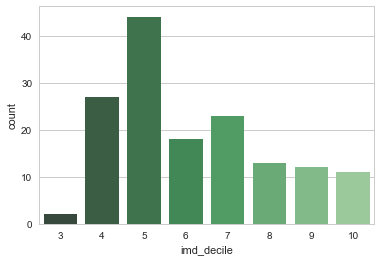

In [12]:
sns.countplot(x="imd_decile", data=df_orig.loc[df_orig['cluster'] == 1], palette="Greens_d")
print ("Mean average imd_decile in Cluster 1 is " + str(round(df_orig.loc[df_orig['cluster'] == 1].imd_decile.mean(), 2)))
plt.show()

From this we can make a couple of statements about the mean average of imd_decile in Cluster 1.
1. It is much higher than the average in Birmingham
2. It is slightly higher than average for the country.

By including this in a for-loop we can produce a bar graph of the imd_deciles for each of the clusters

Cluster 1
Mean average of the imd_deciles 6.17


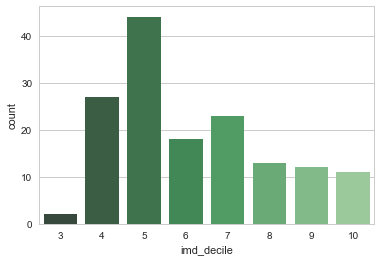

Cluster 2
Mean average of the imd_deciles 2.01


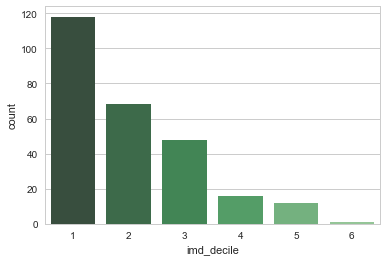

Cluster 3
Mean average of the imd_deciles 1.21


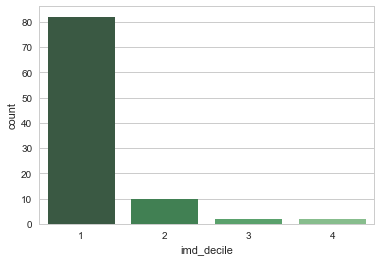

Cluster 4
Mean average of the imd_deciles 3.56


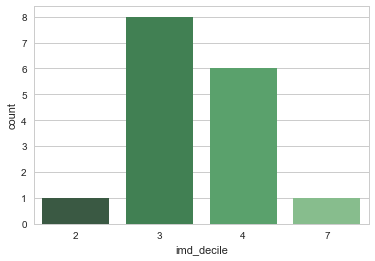

Cluster 5
Mean average of the imd_deciles 2.58


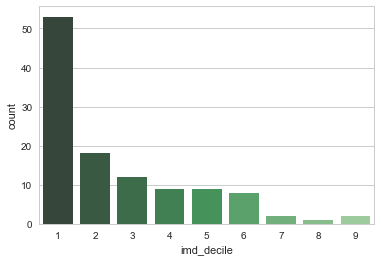

In [13]:
for i in range (1,6):
    sns.countplot(x="imd_decile", data=df_orig.loc[df_orig['cluster'] == i], palette="Greens_d")
    print ("Cluster "+str(i))
    print ("Mean average of the imd_deciles "+str(round(df_orig.loc[df_orig['cluster'] == i].imd_decile.mean(), 2)))
    plt.show()

Now, we can describe the imd_decile mean averages of the five clusters as follows:

Cluster 1
1. Is much higher than the average in Birmingham
2. Is slightly higher than average for the country.

Cluster 2
1. Is slightly lower than the average in Birmingham
2. Is much lower than the average for the country

Cluster 3
1. Is much lower than the average in Birmingham
2. Is much lower than the average for the country

Cluster 4
1. Is slightly higher than the average for Birmingham
2. Is slightly lower than average for the country.

Cluster 5
1. Is slightly lower than the average for Birmingham, in fact it is nearly the same
2. Is much lower than the average for the country

Pulling all of the above analysis together we generate the following:

Cluster 1
Cluster size is 234466 which is 21.85% of Birmingham's total population
Percentage of cluster diagnosed with depression is 7.15%
Has a much higher proportion of people of white ethnicity than average in Birmingham 
Has a lower proportion of people of all other ethnicities than average in Birmingham 
Economically
Is much higher than the average in Birmingham
Is slightly higher than average for the country.

Cluster 2
Cluster size is 418004 which is 38.95% of Birmingham's total population
Percentage of cluster diagnosed with depression is 8.67
Has a higher proportion of people of white ethnicity than average in Birmingham 
Has a lower proportion of people of all other ethnicities than average in Birmingham 
Economically
Is slightly lower than the average in Birmingham
Is much lower than the average for the country

Cluster 3
Cluster size is 184532 which is 17.2% of Birmingham's total population
Percentage of cluster diagnosed with depression is 5.5
Has a much higher proportion of people of Pakistani ethnicity than average in Birmingham 
Has a higher proportion of people of Black_African_Caribbean and Bangladeshi ethnicity than average in Birmingham 
Has a much lower proportion of people of white ethnicity than average in Birmingham
Economically
Is much lower than the average in Birmingham
Is much lower than the average for the country

Cluster 4
Cluster size is 34561 which is 3.22% of Birmingham's total population
Percentage of cluster diagnosed with depression is 6.98
Has a higher proportion of people of Indian and Chinese ethnicities than average in Birmingham 
Has a much lower proportion of people of Pakistani ethnicity than average in Birmingham 
Economically
Is slightly higher than the average for Birmingham
Is slightly lower than average for the country.

Cluster 5
Cluster size is 201482 which is 18.78% of Birmingham's total population
Percentage of cluster diagnosed with depression is 7.0
Has a much higher proportion of people of Black_African_Caribbean and Indian ethnicities than average in Birmingham 
Has a slightly higher proportion of people of Pakistani ethnicity than average in Birmingham 
Has a lower proportion of people of white ethnicity than average in Birmingham 
Economically
Is slightly lower than the average for Birmingham, in fact it is nearly the same
Is much lower than the average for the country

Making this a bit more snappy, we can describe the clusters as follows:
Cluster 1: White and affluent with average rates of diagnosed depression
Cluster 2: White and poor with higher rates of diagnosed depression
Cluster 3: Non-white and poor with lower rates of diagnosed depression
Cluster 4: Mixed except for Pakistani with average rates of diagnosed depression
Cluster 5: Non-white with average rates of diagnosed depression

Finally, [we can map this quickly, using Tableau](https://public.tableau.com/profile/siwhitehouse#!/vizhome/BirminghamDepressionClustering/BirminghamDepressionClustering)